## Fitting drug response curves with sigmoid function

1. Test different fitting function:
2. visualise fitting and analyse errors
3. Make visualisation of absolute and relative methods of estimaton of IC50

In [1]:
import pandas as pd
import numpy as np


from tqdm import tqdm
import warnings
from fitting import *

warnings.filterwarnings("ignore")
_FOLDER = "data/"
_FOLDER_2 = "figures/"

In [2]:
import os
os.listdir("results")

['filt_auc_limit_02.csv',
 'filt_1234.csv',
 'filt_auc_limit_06.csv',
 'filt_123.csv',
 'filt_auc_limit_04.csv']

## Fitting data

In [3]:
df = pd.read_csv("results/filt_123.csv")
conc_columns= ["fd_num_"+str(i) for i in range(10)]
response_norm = ['norm_cells_'+str(i) for i in range(10)]

### sigmoid_4_param

In [4]:
%%time
fitting_function = "sigmoid_4_param"
r2, fit_param = FittingColumn(df, df.index, x_columns=conc_columns, y_columns= response_norm,
                               fitting_function = fitting_function, default_param=True)
df[fitting_function+"_r2"] = r2
df[fitting_function] = fit_param
df= df[df[fitting_function+"_r2"]>0]
print("R2>0:", df.shape)
print("R2>0.9", df[df[fitting_function+"_r2"]>0.9].shape[0])
print("Number of samples with fitting <0.1:", df[df[fitting_function+"_r2"]<0.1].shape[0])
print("")

100%|██████████| 2776/2776 [00:03<00:00, 732.46it/s]

R2>0: (2724, 32)
R2>0.9 2672
Number of samples with fitting <0.1: 32

CPU times: user 3.79 s, sys: 37 ms, total: 3.83 s
Wall time: 3.81 s


## Illustration of different methods of estimation of IC50

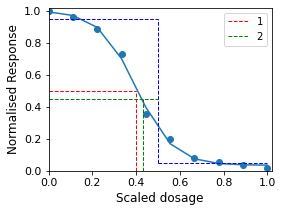

In [5]:
plt.figure(figsize=(4,3))
ind =int(df[(df["DRUG_ID"]==274)& (df["COSMIC_ID"]==1240223)].index[0])
fitting_parameters =fitting_function

x = df.loc[ind, conc_columns].astype("float32")
y = df.loc[ind, response_norm].astype("float32")
plt.scatter(x, y)
plt.tick_params(labelsize=11)
plt.xlabel("Scaled dosage", fontsize=12)
plt.ylabel("Normalised Response", fontsize=12)

fit_param = df.loc[ind, fitting_parameters]
y_fit = sigmoid_4_param(x, *fit_param)
r2 = r2_score(y, y_fit)
plt.plot(x, y_fit)
plt.xlim([0,1.02])
plt.ylim([0,1.02])
#horisontal line
x2 = np.linspace(0, 0.4, 5)
y2 = np.array([0.5]*5)
#vertical line
x3= np.array([0.4]*5)
y3=np.linspace(0, 0.5, 5)
plt.plot(x2, y2, "red", linewidth = 1, linestyle='dashed')
plt.plot(x3, y3, "red", linewidth = 1, linestyle='dashed', label ="1")

#upper plateu
x4 = np.linspace(0, 0.5, 5)
y4 = np.array([0.95]*5)

#lower plateu
x5 = np.linspace(0.5, 1, 5)
y5 = np.array([0.05]*5)
#vertical line - difference between plateus
x6= np.array([0.5]*5)
y6=np.linspace(0.05, 0.95, 5)

#horisontal line - 50% response
x7 = np.linspace(0, 0.5, 5)
y7 = np.array([0.45]*5)
#vertical line 
x8= np.array([0.43]*5)
y8=np.linspace(0, 0.45, 5)
plt.plot(x4, y4, "blue", linewidth = 1, linestyle='dashed')
plt.plot(x5, y5, "blue", linewidth = 1, linestyle='dashed')
plt.plot(x6, y6, "blue", linewidth = 1, linestyle='dashed')
plt.plot(x7, y7, "green", linewidth = 1, linestyle='dashed')
plt.plot(x8, y8, "green", linewidth = 1, linestyle='dashed', label = "2")
plt.legend()

plt.savefig(_FOLDER_2+"IC50_methods.png", bbox_inches='tight', dpi=300);